In [ ]:
from diffusers.utils import make_image_grid
from helpers import OpenCvCanvas, generate_image, generate_image_controlnet

c:\Users\jaspt\miniconda3\envs\diffusers-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


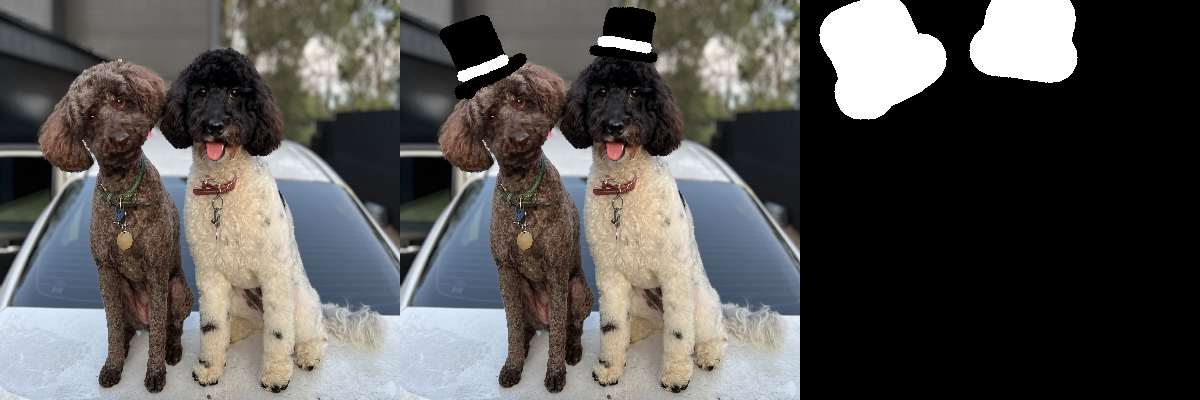

In [2]:

size=(400,400)
image_filename="labradoodle.jpg"

window = OpenCvCanvas(image_filename, size, mask_padding=20)
img, mask = window.create_window()

make_image_grid([window.get_base_pil(), img, mask], rows=1, cols=3)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 12.65it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 30/30 [00:02<00:00, 12.55it/s]


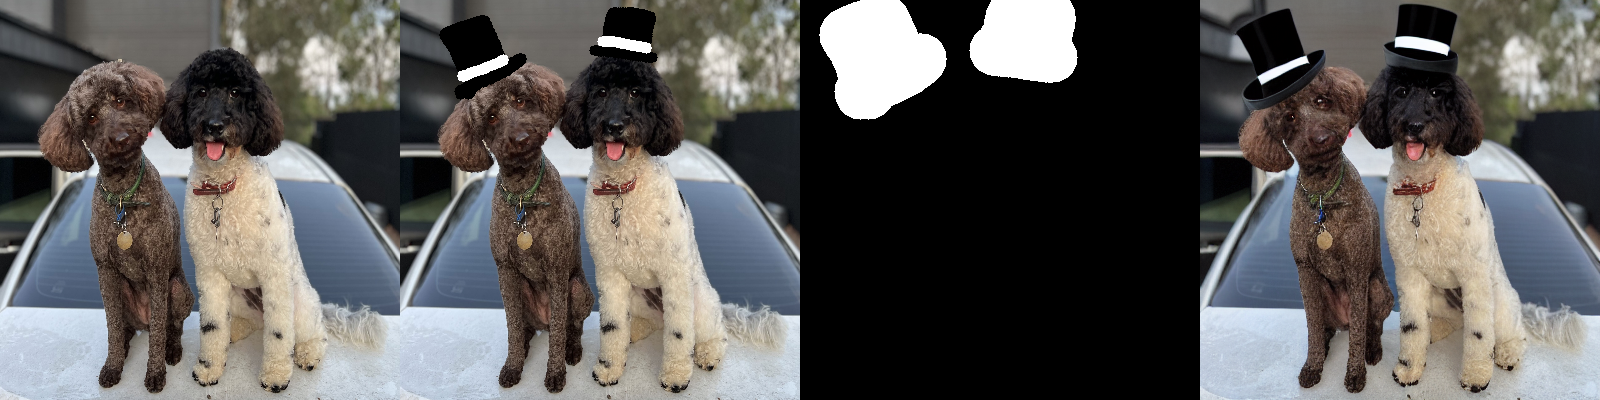

In [ ]:
negative_prompt = "blurry, blended, deformed, missing eyes, cartoon"
params = {
    "strength": 0.6,
    "guidance_scale": 12.5,
    "num_inference_steps": 50,
    "negative_prompt": negative_prompt
}
prompt = "Top hat, fashionable, realistic, fabric"
upscaling_factor = 2 # Accidentally doubled the height and width while rendering and made results super good for abstract drawings
imgo = generate_image_controlnet(mask, img, (size[0]*upscaling_factor, size[1]*upscaling_factor), prompt, params).resize(size)
# imgo.show()
make_image_grid([window.get_base_pil(), window.get_base_painted_pil(), window.get_mask_pil(), imgo], rows=1, cols=4)